<a href="https://colab.research.google.com/github/Jbolda2/Capstone/blob/main/JBolda_QueryTool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# **Setup**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Dealership.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
494,Maruti Swift Vdi BSIII,2010,310000,100000,Diesel,Individual,Manual,Third Owner
495,Hyundai Santro Xing GLS Audio LPG,2012,250000,100000,LPG,Individual,Manual,First Owner
496,Ford Figo 1.2P Titanium MT,2019,700000,12586,Petrol,Dealer,Manual,First Owner
497,Fiat Avventura Urban Cross 1.3 Multijet Emotion,2018,650000,38083,Diesel,Dealer,Manual,First Owner


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.shape

(499, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           499 non-null    object
 1   year           499 non-null    int64 
 2   selling_price  499 non-null    int64 
 3   km_driven      499 non-null    int64 
 4   fuel           499 non-null    object
 5   seller_type    499 non-null    object
 6   transmission   499 non-null    object
 7   owner          499 non-null    object
dtypes: int64(3), object(5)
memory usage: 31.3+ KB


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())

fuel
Petrol    251
Diesel    238
CNG         6
LPG         4
Name: count, dtype: int64
seller_type
Individual    406
Dealer         93
Name: count, dtype: int64
transmission
Manual       456
Automatic     43
Name: count, dtype: int64


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset/Marketplace.csv')
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2001,68000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2017,500000,26500,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2013,170000,60000,Diesel,Individual,Manual,Second Owner
3,Datsun RediGO T Option,2018,1300000,35000,Diesel,Individual,Manual,Second Owner
4,Honda Amaze VX i-DTEC,2020,1050000,10000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
494,Maruti Swift Vdi BSIII,2010,175000,45000,Petrol,Individual,Manual,Second Owner
495,Hyundai Santro Xing GLS Audio LPG,2009,170000,44800,Petrol,Individual,Manual,Third Owner
496,Ford Figo 1.2P Titanium MT,2006,100000,40000,Petrol,Individual,Manual,First Owner
497,Fiat Avventura Urban Cross 1.3 Multijet Emotion,2014,150000,120000,Petrol,Individual,Manual,First Owner


In [ ]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2001,68000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2017,500000,26500,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2013,170000,60000,Diesel,Individual,Manual,Second Owner
3,Datsun RediGO T Option,2018,1300000,35000,Diesel,Individual,Manual,Second Owner
4,Honda Amaze VX i-DTEC,2020,1050000,10000,Diesel,Individual,Manual,Second Owner


In [ ]:
df2.shape

(499, 8)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           499 non-null    object
 1   year           499 non-null    int64 
 2   selling_price  499 non-null    int64 
 3   km_driven      499 non-null    int64 
 4   fuel           499 non-null    object
 5   seller_type    499 non-null    object
 6   transmission   499 non-null    object
 7   owner          499 non-null    object
dtypes: int64(3), object(5)
memory usage: 31.3+ KB


In [ ]:
df2.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
print(df2.fuel.value_counts())
print(df2.seller_type.value_counts())
print(df2.transmission.value_counts())

fuel
Diesel    257
Petrol    238
CNG         2
LPG         2
Name: count, dtype: int64
seller_type
Individual          388
Dealer              105
Trustmark Dealer      6
Name: count, dtype: int64
transmission
Manual       456
Automatic     43
Name: count, dtype: int64


In [ ]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2001,68000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2017,500000,26500,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2013,170000,60000,Diesel,Individual,Manual,Second Owner
3,Datsun RediGO T Option,2018,1300000,35000,Diesel,Individual,Manual,Second Owner
4,Honda Amaze VX i-DTEC,2020,1050000,10000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.replace({'seller_type':{'Individual': 'Dealer'}},inplace=True)


In [ ]:
def visualize_results(results):
  plt.figure(figsize=(12, 6))
  sns.scatterplot(x='year', y='selling_price', data=results, hue='name', legend='full')
  plt.xlabel('Year')
  plt.ylabel('Selling Price')
  plt.title('Selling Price vs Year')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()



In [ ]:
def find_matching_items(df1, df2):
  matching_items = df2[df2['name'].isin(df1['name'])]
  return matching_items[['name', 'selling_price']]

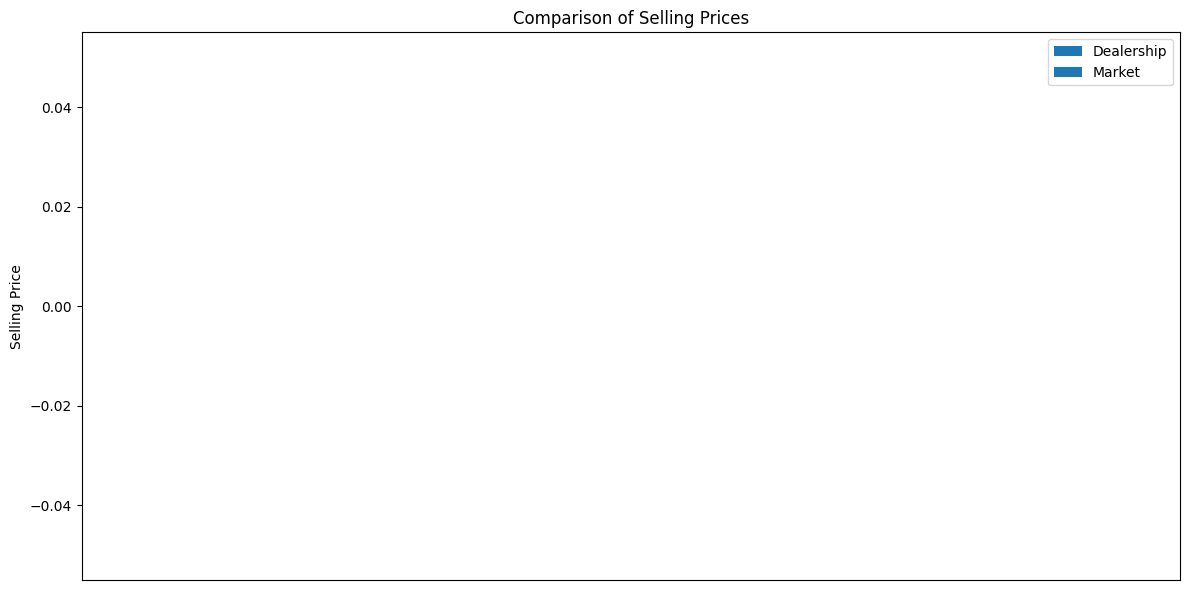

In [ ]:
def create_bar_graph(df1, df2):
  matching_items = find_matching_items(df1, df2)

  x_labels = df1['name'].unique()
  y1_values = []
  y2_values = []

  for name in x_labels:
    selling_price1 = df1[df1['name'] == name]['selling_price'].iloc[0] if not df1[df1['name'] == name].empty else 0

    selling_price2 = matching_items[matching_items['name'] == name]['selling_price'].iloc[0] if not matching_items[matching_items['name'] == name].empty else 0

    y1_values.append(selling_price1)
    y2_values.append(selling_price2)


  x_pos = range(len(x_labels))
  width = 0.35

  fig, ax = plt.subplots(figsize=(12, 6))
  rects1 = ax.bar(x_pos, y1_values, width, label='Dealership')
  rects2 = ax.bar([p + width for p in x_pos], y2_values, width, label='Market')

  ax.set_ylabel('Selling Price')
  ax.set_title('Comparison of Selling Prices')
  ax.set_xticks([p + width / 2 for p in x_pos])
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
  ax.legend()

  plt.tight_layout()
  plt.show()

create_bar_graph(query_df(df, name = "Honda"), df2)

# **Car Search**

How To Use:


1.   Enter one or more search conditions into the field on the right. The name section can be used for make and/or model and will recognize partial matches.
2.   The fuel type, transmission type, and amount of previous owners can be changed using the dropdown menu
3. Once all of the conditions have been entered, press the play button in the top left corner next to "def query_df" to search. All matching cars will be displayed. Graphs will also be displayed that compare those cars to their current market value, as well as a graph that compares their price to their year.




                                            name  year  selling_price  \
77        Ford EcoSport 1.5 Diesel Titanium BSIV  2017         925000   
134    Ford Figo Aspire 1.2 Ti-VCT Titanium Plus  2015         530000   
135  Ford EcoSport 1.5 Diesel Titanium Plus BSIV  2017         840000   
209                    Ford Figo Petrol Titanium  2014         350000   
243                    Ford Figo Petrol Titanium  2015         300000   
298            Ford Figo Aspire 1.2 Ti-VCT Trend  2017         530000   
299                    Ford Figo Aspire Facelift  2018         624000   
317             Ford Aspire Titanium Diesel BSIV  2017         700000   
326           Ford Figo Aspire 1.5 TDCi Titanium  2017         700000   
331                  Ford Endeavour Titanium 4X2  2011         600000   
363         Ford Figo Diesel Celebration Edition  2013         150000   
398            Ford Ecosport 1.5 DV5 MT Titanium  2014         500000   
419                   Ford Endeavour 2.5L 4X2 MT  2

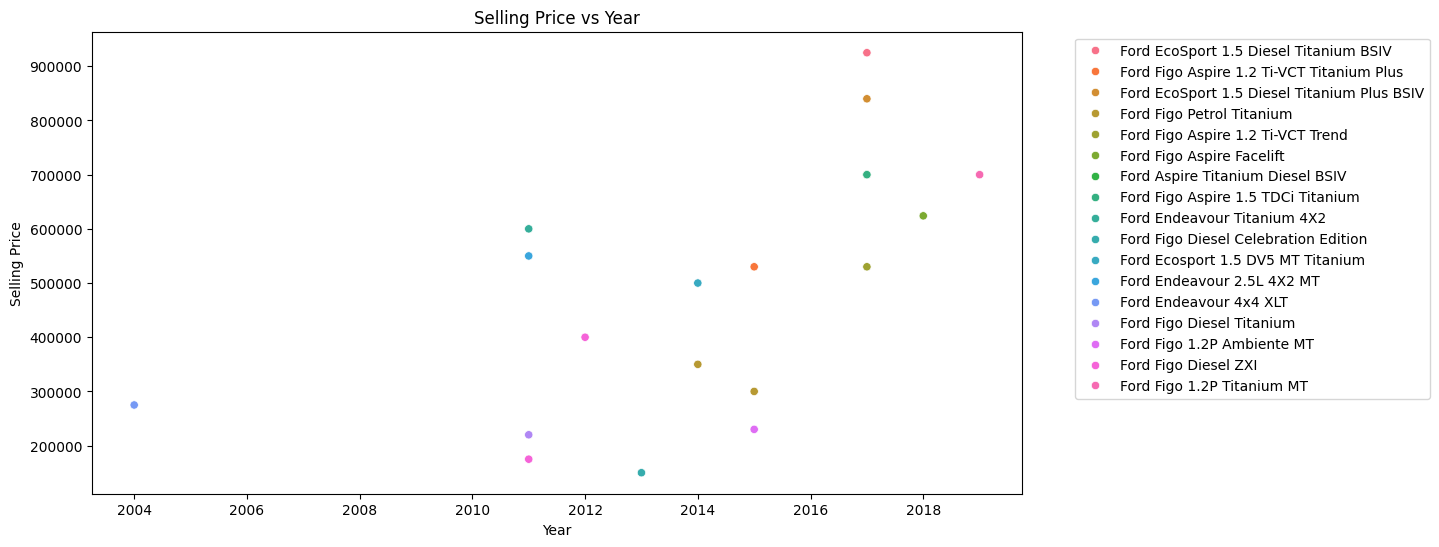

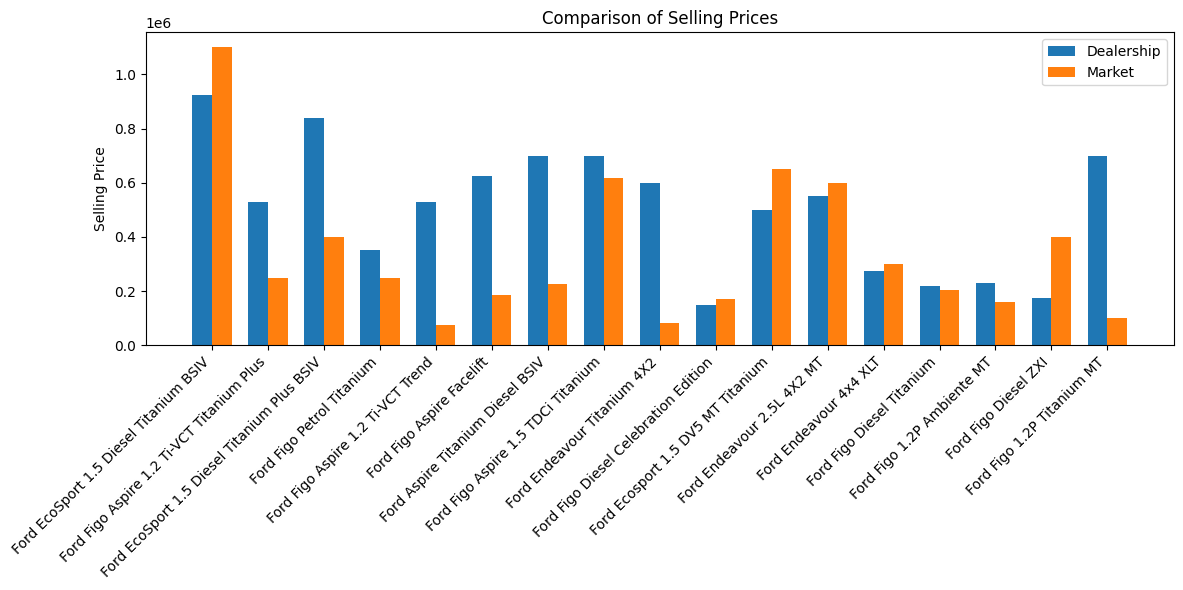

In [ ]:
def query_df(df, name=None, year=None, mileage=None, selling_price=None, fuel=None, seller_type=None, transmission=None, owner=None):
  query_results = df.copy()

  if name:
    query_results = query_results[query_results['name'].str.contains(name, case=False, na=False)]
  if year:
    query_results = query_results[query_results['year'] == year]
  if mileage:
    query_results = query_results[query_results['mileage'] <= mileage]
  if selling_price:
    query_results = query_results[query_results['selling_price'] <= selling_price]
  if fuel != "Any":
    query_results = query_results[query_results['fuel'] == fuel]
  if seller_type:
    query_results = query_results[query_results['seller_type'] == seller_type]
  if transmission != "Any":
    query_results = query_results[query_results['transmission'] == transmission]
  if owner != "Any":
    if owner == 'First Owner':
      query_results = query_results[query_results['owner'] == 'First Owner']
    elif owner == 'Second Owner':
      query_results = query_results[query_results['owner'].isin(['First Owner', 'Second Owner'])]
    elif owner == 'Third Owner':
      query_results = query_results[query_results['owner'].isin(['First Owner', 'Second Owner', "Third Owner"])]
    elif owner == 'Fourth & Above Owner':
      query_results = query_results[query_results['owner'].isin(['First Owner', 'Second Owner', "Third Owner", "Fourth & Above Owner"])]
  return query_results


Name = "Ford" #@param {type:"string"}
Year =  None#@param {type:"number"}
Miles = None#@param {type:"number"}
Price = None#@param {type:"number"}
Fuel = "Any" #@param ["Any", "Diesel", "Petrol", "LPG", "CNG"]
Transmission = "Any" #@param ["Any", "Automatic", "Manual"]
Owners = "Any" #@param ["Any", "First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner"]

results = query_df(df, name=Name, year=Year, mileage=Miles, selling_price=Price, fuel=Fuel, seller_type= "Dealer", transmission=Transmission, owner=Owners)
print(results)
visualize_results(results)
create_bar_graph(results, df2)

# **Start of Model Training**

In [ ]:
df.replace({'owner':{'First Owner':1,'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4}},inplace=True)

<ipython-input-89-5e56fa94e4a1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'owner':{'First Owner':1,'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4}},inplace=True)


In [ ]:
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3}},inplace=True)

df.replace({'seller_type':{'Dealer':0,'Individual':0}},inplace=True)

df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-90-ba7794cb1569>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3}},inplace=True)
<ipython-input-90-ba7794cb1569>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'seller_type':{'Dealer':0,'Individual':0}},inplace=True)
<ipython-input-90-ba7794cb1569>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in t

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

df.replace({'Seller_Type':{'Dealer':0,'Individual':0}},inplace=True)

df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df2.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

df2.replace({'seller_type':{'Dealer':0,'Individual':0}},inplace=True)

df2.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [ ]:
X =new_df.drop(['name', 'selling_price'], axis=1)
Y = new_df['selling_price']

In [ ]:
print(X)

     year  km_driven  fuel  seller_type  transmission  owner market_price
0    2007      70000     0            0             0      1        68000
1    2007      50000     0            0             0      1       500000
2    2012     100000     1            0             0      1       170000
3    2017      46000     0            0             0      1      1300000
4    2014     141000     1            0             0      2      1050000
..    ...        ...   ...          ...           ...    ...          ...
494  2010     100000     1            0             0      3       150000
495  2012     100000     3            0             0      1       170000
496  2019      12586     0            0             0      1       100000
497  2018      38083     1            0             0      1       150000
498  2012      55328     1            0             0      1       400000

[499 rows x 7 columns]


In [ ]:
print(Y)

0       60000
1      135000
2      600000
3      250000
4      450000
        ...  
494    310000
495    250000
496    700000
497    650000
498    400000
Name: selling_price, Length: 499, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [ ]:
linear_regression_model = LinearRegression()

In [ ]:
linear_regression_model.fit(X_train, Y_train)

LinearRegression()

# **Training The Model**

In [ ]:
market_prediction = linear_regression_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, market_prediction)
print("R squared error : ", error_score)

R squared error :  0.43356767476918845


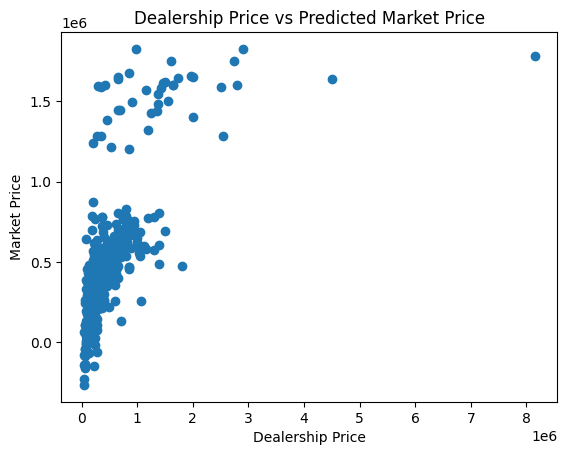

In [ ]:
plt.scatter(Y_train, market_prediction)
plt.xlabel("Dealership Price")
plt.ylabel("Market Price")
plt.title("Dealership Price vs Predicted Market Price")
plt.show()

# **Testing The Model**

In [ ]:
test_data_prediction = linear_regression_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.5902037657364854


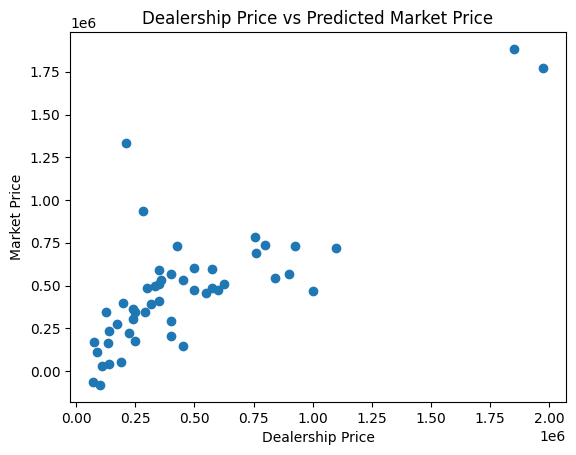

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Dealership Price")
plt.ylabel("Market Price")
plt.title("Dealership Price vs Predicted Market Price")
plt.show()